## Assignment 4
### Juhi Pandey
### 2018393

Simulated Annealing

*Importing relevant packages*

In [1]:
import random
import matplotlib.pyplot as plt
import math

*Returns a random motif of given length*

In [2]:
def random_motif(length_motif):
    motif = ""
    n = ["a", "t", "c", "g"]
    for i in range(length_motif):
        motif += random.choice(n)
    return motif

*Hamming score returns score equal to the number of matching nucleotides in 2 sequences, more the similarity higher the score*

In [3]:
def hamming_score(s1, s2):
    sc = 0
    for i in range(len(s1)):
        if s1[i] == s2[i]:
            sc += 1
    return sc

*Cost function to maximise score and return it*
This calculates score by fiding max hamming score for each sequence and then adding scores for all sequences

In [4]:
def cost_function(list_dna, motif):
    cum_score = 0
    length_motif = len(motif)
    for dna in list_dna:
        score = 0
        for ind in range(len(list_dna[0])-length_motif+1):
            score = max(score, hamming_score(motif, dna[ind: ind+length_motif]))
            # print("ham", motif, dna[ind: ind+length_motif])
        cum_score += score
        # maximise cumulative score
    return cum_score

*find_neighbour returns a sequence with max 2 mutations*

In [5]:
def find_neighbour(motif):
    # max 2 mutations
    pos1 = random.randint(0, len(motif)-1)
    pos2 = random.randint(0, len(motif)-1)
    motif = motif[:pos1] + random.choice(["a", "t", "c", "g"]) + motif[pos1 + 1:]
    motif = motif[:pos2] + random.choice(["a", "t", "c", "g"]) + motif[pos2 + 1:]
    return motif

**Function that performs simulated annealing** <br>
Calls functions to find random motif, calculates its cost and while conditions are favorable, keeps finding neighbours and updating scores, changes t every iteration<br>
Runs for maximum 500 iterations if loop doesn't break<br>
Finds best motif match and prints it<br>
Also plots a graph to show costs and iterations


In [6]:
def simulated_annealing(list_dna, length_motif):
    motif = random_motif(length_motif)
    cost_new = cost_function(list_dna, motif)
    cost_old = 0
    final_motif = ""

    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    time = 1
    flag = True
    iterations = 0
    t = 2000
    while flag:
        # print(cost_new, motif)
        iterations += 1
        plt.plot(time, cost_new, color='black', marker='o', markersize=0.3)
        time += 1
        neighbour = find_neighbour(motif)
        cost_old = cost_new
        cost_new = cost_function(list_dna, neighbour)
        max_cost = 0
        if cost_new > max_cost:
            max_cost = cost_new
            final_motif = motif

        if iterations > 500:
            flag = False

        elif cost_new >= cost_old:
            motif = neighbour
            
        else:
            try:
                # probability of e^(-cost/t)  
                if random.uniform(0, 1) < math.exp(-(cost_new - cost_old) / t):
                    motif = neighbour

            except:
                flag = False


        t *= 0.95

    # plt.plot(time, cost_new, color='black', marker='o', markersize=3)
        plt.plot([time-1, time], [cost_old, cost_new], 'k-')

    
    plt.show()
    return final_motif


*Main Function to take inputs*

Enter length: 10
Enter no of seq: 5
agcaatcgcccgtattccgttaaagcctgcctcgctagctcgaagctg
ggtcttgcgtgcatcgctaagctagcaaccgctagcatgcgctagcct
gattcgaataggcaaacgcacgaagtccgttaaagctagcatcgatcg
gctagctagcactattccgttttagcgatccgcctagccagagagatc
ccgctcgatcgtagcggatcgctagcatttcgttatccgtgcatagcg


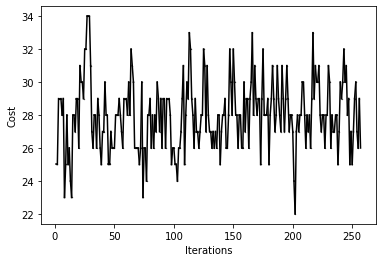

taaagttaca


In [7]:
if __name__ == "__main__":
    list_dna = []
    length_motif = int(input("Enter length: "))
    no_of_seq = int(input("Enter no of seq: "))
    for i in range(no_of_seq):
        list_dna.append(input())
    ans = simulated_annealing(list_dna, length_motif)
    print(ans)

So the best match is found to be: taaagttaca